In [ ]:
#standard steps to use a json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


downloaded the dataset

In [ ]:
#now copying the api command
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 137MB/s]
100% 1.06G/1.06G [00:07<00:00, 147MB/s]


speed is so fast
most efficienet way to load data

the dataset is actually in kaggle only, just like the address is used for work

the dataset is in .zip format(compressed form)->SO DECOMPRESS IT( UNZIP IT)

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip") #zip file name(dogs and cats)
zip_ref.extractall('/content')
zip_ref.close()

LOADing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten



WE WILL USE CONCEPT OF GENERATORS TO LOAD DATA IN BATCHES AND AT THE SAME TIME CUSTOMIZE IT AS WELL

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    label_mode='int', #cat-->0 and dog-->1
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


NORMALISATION

In [ ]:
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#creating a CNN model
'''
from tensorflow.keras.models import Sequential
model1=Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
model1.add(MaxPooling2D( pool_size(2,2), strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

'''
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 92ms/step - loss: 0.6238 - accuracy: 0.6479 - val_loss: 0.5626 - val_accuracy: 0.7072
Epoch 2/10
625/625 [==============================] - 74s 118ms/step - loss: 0.4914 - accuracy: 0.7599 - val_loss: 0.4898 - val_accuracy: 0.7764
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3777 - accuracy: 0.8260 - val_loss: 0.5841 - val_accuracy: 0.7764
Epoch 4/10
625/625 [==============================] - 62s 98ms/step - loss: 0.2377 - accuracy: 0.9004 - val_loss: 0.8416 - val_accuracy: 0.7576
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1314 - accuracy: 0.9504 - val_loss: 0.9332 - val_accuracy: 0.7526
Epoch 6/10
625/625 [==============================] - 67s 105ms/step - loss: 0.0881 - accuracy: 0.9712 - val_loss: 1.1885 - val_accuracy: 0.7718
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0589 - accuracy: 0.9808 - val_loss: 1.3553 - val_accura

RESULTS area showing that our model is overfit


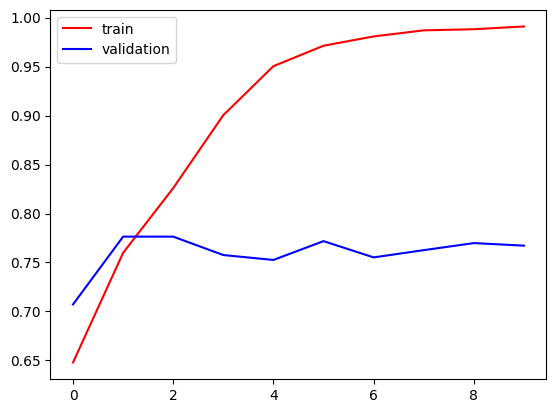

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

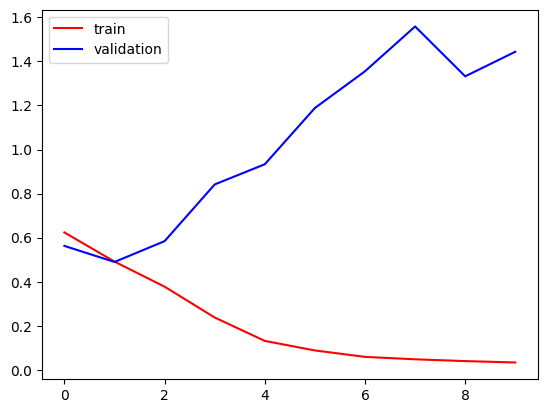

In [ ]:
#loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

NOW WE WILL REGULARISE OUR MODEL

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),


model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation = 'sigmoid'))


Batch regularisation is a technique used in training neural network to make them faster and more stable
It actually makaes the training data mean as 0 and standard deviation as 1

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 104ms/step - loss: 1.4338 - accuracy: 0.5552 - val_loss: 0.6746 - val_accuracy: 0.5526
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6309 - accuracy: 0.6433 - val_loss: 0.5702 - val_accuracy: 0.6942
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5789 - accuracy: 0.6999 - val_loss: 0.7949 - val_accuracy: 0.6364
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5108 - accuracy: 0.7398 - val_loss: 0.4674 - val_accuracy: 0.7788
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4758 - accuracy: 0.7631 - val_loss: 1.2729 - val_accuracy: 0.5330
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4149 - accuracy: 0.7883 - val_loss: 0.4265 - val_accuracy: 0.7940
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3587 - accuracy: 0.8155 - val_loss: 0.4431 - val_ac

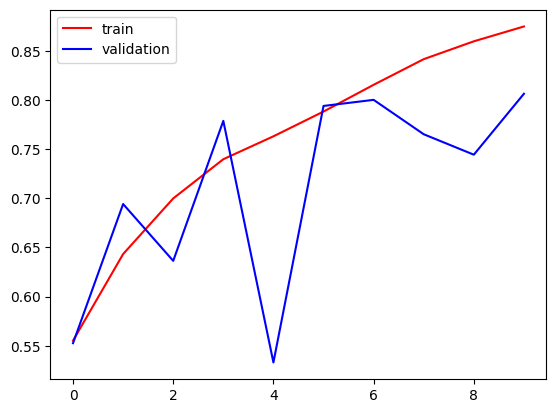

In [ ]:
#accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

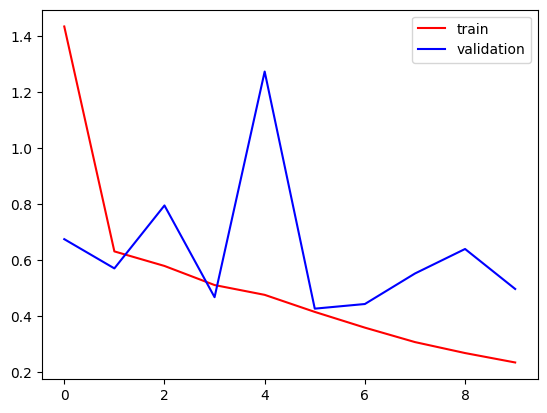

In [ ]:
#loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

CONCLUSION-> after normalisation, somehow the model is not very  overfitted now

#Object Detection

In [ ]:
import cv2

In [ ]:
#get the image in jpg format
test_img=cv2.imread('/content/dogg.jpg')

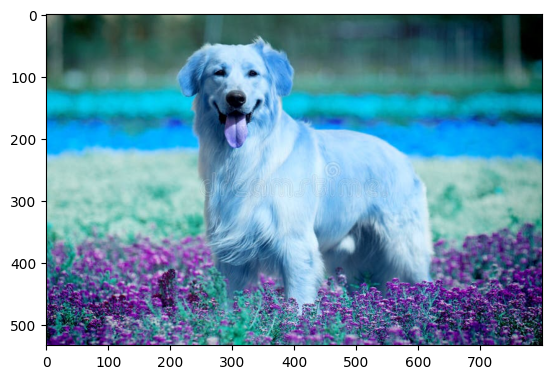

In [ ]:
plt.imshow(test_img)
plt.show()

In [ ]:
#shape should be width height=256,256
test_img.shape

(534, 800, 3)

reshape test image

In [ ]:
#so reshape this test image
test_img=cv2.resize(test_img,(256,256))  #resize is used to change size of existing image

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
#now will change dimension using -reshape function

In [ ]:
test_img=test_img.reshape(1,256,256,3)

In [ ]:
test_img.shape

(1, 256, 256, 3)

In [ ]:
#MAKING PREDICTION
result= model1.predict(test_img)

1/1 [==============================] - 0s 385ms/step


In [ ]:
int(result)

<ipython-input-40-baa5c0abe21d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(result)


0

#predicted incorrectly it should have been a dog

In [ ]:
#prediction 2
test_img2=cv2.imread('/content/dog2.jpg')

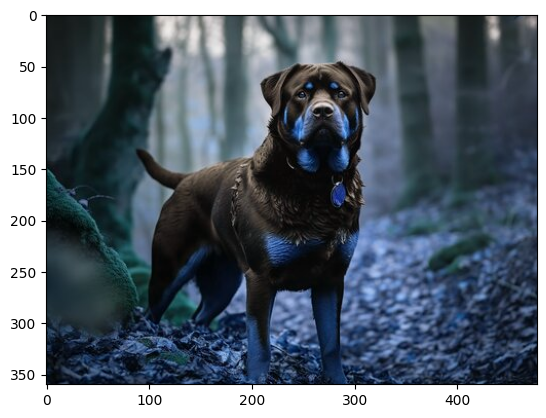

(360, 478, 3)

In [ ]:
plt.imshow(test_img2)
plt.show()
test_img2.shape

In [ ]:
#so reshape this test image
test_img2=cv2.resize(test_img2,(256,256))
test_img2.shape

(256, 256, 3)

In [ ]:
test_img2=test_img2.reshape(1,256,256,3) # changing dimension

In [ ]:
result2= model1.predict(test_img2)

1/1 [==============================] - 0s 19ms/step


In [ ]:
int(result2)

<ipython-input-49-3f3e1e0d7940>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(result2)


1

Predicted image 2 correctly

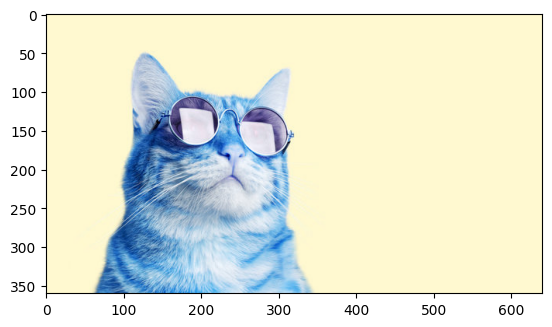

(360, 640, 3)

In [ ]:
test_img3=cv2.imread('/content/cat.jpg')
plt.imshow(test_img3)
plt.show()
test_img3.shape


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:3699: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [ ]:
test_img3=test_img3.reshape(1,256,256,3)
result=model1.predict(test_img3)

1/1 [==============================] - 0s 84ms/step


In [ ]:
int(result)

<ipython-input-59-baa5c0abe21d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(result)


0